# Introduction

## Plotly library 
Plotly's Python graphing library makes interactive, publication-quality graphs online.

Content:

1. [Loading Data and Explanation of Features](#1)
1. [Line Charts](#2)
1. [Scatter Charts](#3)
1. [Bar Charts](#4)
1. [Pie Charts](#5)
1. [Bubble Charts](#6)
1. [Histogram](#7)
1. [Word Cloud](#8)
1. [Box Plot](#9)
1. [Scatter Plot Matrix](#10)
1. [Inset Plots](#11)
1. [3D Scatter Plot with Colorscaling](#12)
1. [Multiple Subplots](#13)

In [1]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# numpy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv


<a id="1"></a> <br>
# Loading Data and Explanation of Features
* timesData includes 14 features that are:
    * world_rank
    * university_name
    * country
    * teaching
    * international
    * research
    * citations
    * income
    * total_score
    * num_students
    * student_staff_ratio
    * international_students
    * female_male_ratio
    * year

In [2]:
# Load data
timesData = pd.read_csv("../input/world-university-rankings/timesData.csv")

In [3]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [4]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


## Line Charts

* Import graph_objs as go
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marked is used with dictionary.
        * color = color of lines. It takes RGB and opacity
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
    * fig = it includes data and layout
    * iplot() = plots the figure(fig) that is created by data and layout

In [5]:
# prepare data frame
df = timesData.iloc[:100,:]

# Creating trace1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = df.university_name)

# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "citations",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = df.university_name)

data = [trace1, trace2]

layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
             xaxis = dict(title = 'World Rank', ticklen = 5, zeroline = False))

fig = dict(data = data, layout = layout)
iplot(fig)

## Scatter Charts

In [6]:
# prepare dataframes
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

# creating trace1
trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = df2014.university_name)

#creating trace2
trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = df2015.university_name)

#creating trace2
trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = df2016.university_name)

data = [trace1, trace2, trace3]

layout = dict(title = 'Citation vs World rank of top 100 universities with 2014, 2015 and 2016 years',
             xaxis = dict(title = 'World Rank', ticklen = 5, zeroline = False),
             yaxis = dict(title = 'Citation', ticklen = 5, zeroline = False))

fig = dict(data = data, layout = layout)
iplot(fig)

## Bar Charts

In [7]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3, :]

#creating trace1
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5)),
                text = df2014.country)

#creating trace2
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5)),
                text = df2014.country)

data = [trace1, trace2]

layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [8]:
x = df2014.university_name

# creating trace1 with another method
trace1 = {
    'x': x,
    'y': df2014.citations,
    'name': 'citation',
    'type': 'bar'
}

# trace2
trace2 = {
    'x': x,
    'y': df2014.teaching,
    'name': 'teaching',
    'type': 'bar'
}

data = [trace1, trace2];

layout = {
    'xaxis': {'title': 'Top 3 universities'},
    'barmode': 'relative',
    'title': 'citations and teaching of top 3 universities in 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Pie Charts

In [9]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # object(2,4)  => object(2.4)  => float(2.4)
labels = df2016.university_name

# figure
fig = {
    "data": [
      {
        "values": pie1_list,
        "labels": labels,
        "domain": {"x": [0, .5]},
        "name": "Number of Student Rates",
        "hoverinfo":"label+percent+name",
        "hole": .3,
        "type": "pie"
      },],
    "layout": {
        "title": "Universities Number of Students Rates",
        "annotations": [
            { "font": { "size": 20 },
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

## Bubble Charts

In [10]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text": df2016.university_name
    }
]
iplot(data)

## Histogram

In [11]:
# prepare data
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

trace1 = go.Histogram(
    x = x2011,
    opacity = 0.75,
    name = "2011",
    marker = dict(color = 'rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x = x2012,
    opacity = 0.75,
    name = "2012",
    marker = dict(color = 'rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode = 'overlay',
                  title = 'students-staff ratio in 2011 and 2012',
                  xaxis = dict(title = 'students-staff ratio'),
                  yaxis = dict(title = 'Count'),
)
fig = go.Figure(data = data, layout = layout)

iplot(fig)

## Word Cloud

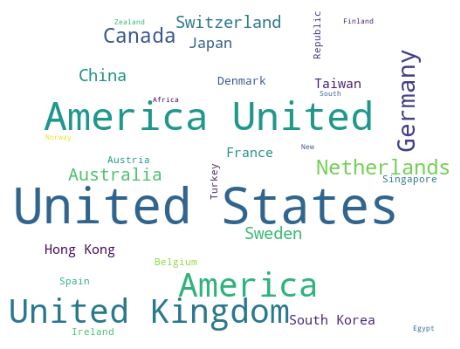

In [12]:
# data preparation
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize = (8,8))
wordcloud = WordCloud(
    background_color = 'white',
    width = 512,
    height = 384
).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

## Box Plot

In [13]:
# data preparation
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

## Scatter Matrix Plots

In [14]:
# import figure factory
import plotly.figure_factory as ff

# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research", "international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)

#scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag = "box", index = 'index', colormap = 'Portland',
                                 colormap_type = 'cat',
                                 height = 700, width = 700)
iplot(fig)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



## Inset Plots

In [15]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## 3D Color Scaling with Colorscaling

In [16]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Multiple Subplots

In [17]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)